# Raw_EYE,ECG_and_Absolute_EEG

### Importing libraries

In [1]:
import pandas as pd

from my_defs import (create_datasets, discriminate_target_association,
                     encoding_one_hot, normalize, predict, generate_samples, explore_dataset)

### Dataset exploration

In [2]:
data = pd.read_excel("ECG + EYE + EEG.xlsx", "ECG EYE brut EEG absolu")
data

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
0,12FM,65.6,2,1,0,3,1,Travaux_2,1,Manger,161,0,1,0,1,1.70009,3.44554,30.982388,1,15.698274,0,3.048080,1,0,0,0,0,1,1,0,1,1,1,1.906000,698.228000,85.932000,36.479000,12.426000,0.000000,5.964000,125.0000,8.777000,50.663000,0.173000,37.937000,62.063000,1.636000,39.01,45.88,42.68,40.44,41.51,39.65,37.58,38.84,37.25,38.25,37.73,46.76,42.88,39.72,41.03,38.80,36.43,37.65,36.13,36.16,36.75,42.32,40.76,38.47,39.54,37.65,35.12,36.27,34.76,36.15,36.62,43.04,39.72,37.63,38.91,36.58,35.03,36.06,34.73,36.26,39.29,47.18,45.89,42.90,44.24,42.01,38.50,40.02,38.02,36.81,38.53,43.18,36.95,1.168606,392,3.267761,146.710903,1.130863,25.001185,7.857998,203.627453,115.399359,6.523452e+05,9.983560e+06,-4.380500e+11,9.454711e+12,1.563030e+08,-9.673883e+11
1,12FM,65.6,2,1,0,6,5,Météo,2,Lecture,224,0,1,2,0,1.95012,NaN,47.246379,1,5.535166,1,0.181597,0,0,0,0,0,0,1,0,0,1,0,2.276000,777.811000,77.140000,22.495000,16.473000,0.680000,4.625000,78.1250,11.647000,29.405000,0.396000,52.300000,47.700000,0.912000,56.17,71.14,62.02,58.53,61.75,56.67,53.85,54.82,53.29,53.88,53.47,71.71,62.91,53.51,62.06,48.81,49.75,51.55,49.27,50.85,53.04,71.98,62.50,52.99,61.36,48.40,49.23,51.29,48.70,50.96,53.34,72.00,62.51,53.02,60.71,48.60,49.58,51.45,49.03,51.38,73.87,92.89,83.26,72.84,82.18,67.69,70.17,72.29,69.52,71.99,53.97,62.98,50.12,1.256584,262,2.195574,169.071013,0.783885,29.656901,14.033268,282.247007,204.568667,1.773078e+07,6.825346e+07,-1.332220e+13,6.418526e+13,5.321981e+09,-2.392428e+13
2,12FM,65.6,2,1,0,2,2,Obstacle,4,Jeu vidéo,354,1,0,1,1,1.95013,1.64899,0.000000,0,8.328222,1,2.853600,1,0,0,0,1,0,1,1,0,1,1,2.251000,746.814000,80.341000,17.772000,17.059000,0.694000,3.919000,62.5000,12.062000,22.113000,0.545000,62.621000,37.379000,0.597000,39.17,45.71,42.83,40.53,41.51,39.87,37.49,38.81,37.09,38.69,37.79,46.06,42.91,39.89,41.04,39.11,36.09,37.51,35.65,36.59,37.00,42.37,41.37,38.44,39.99,37.44,35.20,35.76,35.02,36

In [3]:
explore_dataset(data)

DESCRIPTION


,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,ID NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.00000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.00000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02
mean,45.000645,0.741935,0.574194,0.503226,3.438710,2.60000,3.529032,410.664516,0.806452,0.329032,0.683871,0.748387,2.659307,15.377287,0.329032,8.106141,0.748387,2.218011,0.709677,0.070968,0.561290,0.200000,0.709677,0.290323,0.458065,0.754839,0.387097,0.541935,0.735484,4.564200,859.307165,70.481304,52.295301,42.029302,14.297562,7.071886,88.387284,29.705072,66.276742,0.462099,48.757199,51.243381,0.907314,38.837290,48.703032,44.396065,42.228774,43.018774,41.679419,38.514323,40.150645,37.991677,35.197032,37.141935,48.294839,44.122258,40.804065,41.888839,40.100387,36.929097,38.560387,36.426129,33.344710,34.925677,44.324452,40.775032,38.546645,39.205290,38.120065,35.130516,36.436323,34.6324

****************************************************************************************************
INFORMATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Columns: 115 entries, Sujet to Mean deceleration 
saccade (pixel/s²)
dtypes: float64(86), int64(25), object(4)
memory usage: 139.4+ KB


None

****************************************************************************************************
PRESENCE OF NULL VALUE(S)?


Sujet                                                            0
Age                                                              0
Age category                                                     0
Gender                                                           0
Scenario                                                         0
ID scenario Event                                                0
ID Event                                                         0
Event                                                            0
ID NDRT                                                          0
NDRT                                                             0
NDRT duration (s)                                                0
NDRT duration                                                    0
NDRT solicitation hands                                          0
NDRT solicitation gaze                                           0
Lane changing                                                 

****************************************************************************************************
PRESENCE OF DUPLICATED SAMPLE(S)?


0

****************************************************************************************************


### Data Processing (data cleaning and restructuring)

In [4]:
df = data.copy()

>**We can see that the variables that we can judge as categorical are not all in the 'object' format, which could cause us problems later.**
>
> **To start, we will convert the categorical variables to 'object'**

In [5]:
var_to_object = ['Gender',
                 'ID Event',
                 'ID NDRT',
                 'NDRT duration (s)',
                 'NDRT solicitation hands',
                 'NDRT solicitation gaze',
                 'Lane changing']

In [6]:
df[var_to_object]= df[var_to_object].astype('object')

> **We are going to normalize the continuous variables**

In [7]:
df_normalized = normalize(df, normalization_type='minmax')
df_normalized

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
0,12FM,0.856851,1.0,1,0.0,0.4,1,Travaux_2,1,Manger,161,0.0,1,0,1,0.086964,3.44554,0.157555,1.0,0.251888,0.0,0.636111,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.057076,0.063395,0.903301,0.157035,0.000000,0.000000,0.299954,0.500000,0.000000,0.174704,0.000000,0.262957,0.737043,0.808779,0.134873,0.086037,0.106601,0.109537,0.121145,0.100140,0.111359,0.118710,0.116951,0.219973,0.235849,0.196965,0.171618,0.192687,0.233396,0.162202,0.219955,0.218169,0.222032,0.298730,0.207813,0.124537,0.142464,0.163818,0.178190,0.151592,0.195356,0.195210,0.195320,0.287899,0.169994,0.000121,0.093316,0.102720,0.123764,0.089938,0.143467,0.428976,0.151528,0.294118,0.627577,0.449317,0.591475,0.607318,0.607656,0.607123,0.625403,0.610466,0.629879,0.654060,0.135217,0.102088,0.126503,0.603393,0.518325,0.518009,0.067373,0.676441,0.254460,0.091588,0.274837,0.052638,0.000000,0.004719,0.996221,0.009395,0.000000,0.993712
1,12FM,0.856851,1.0,1,0.0,1.0,5,Météo,2,Lecture,224,0.0,1,2,0,0.123201,NaN,0.240262,1.0,0.087033,1.0,0.027837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.094922,0.266560,0.634996,0.057659,0.034520,0.011871,0.197834,0.285714,0.034620,0.061476,0.231809,0.583905,0.416095,0.351867,0.454545,0.481899,0.421842,0.422080,0.464080,0.398109,0.414339,0.401843,0.418059,0.521303,0.532830,0.595527,0.521671,0.439864,0.590623,0.348400,0.469300,0.466738,0.471605,0.590314,0.541010,0.624368,0.541071,0.442673,0.587034,0.361594,0.477782,0.480707,0.478942,0.611402,0.528869,0.000736,0.527328,0.415144,0.554765,0.336756,0.454099,0.636388,0.459320,0.624754,0.959152,0.955485,0.936249,0.888920,0.963599,0.849067,0.925821,0.915273,0.929053,0.985041,0.380257,0.389211,0.332188,0.769638,0.291449,0.293532,0.145044,0.187545,0.373125,0.192939,0.456720,0.136378,0.929477,0.154686,0.011555,0.295389,1.000000,0.073709
2,12FM,0.856851,1.0,1,0.0,0.2,2,Obstacle,4,Jeu vidéo,354,0.5,0,1,1,0.123202,1.64899,0.000000,0.0,0.132339,1.0,0.59

### Dataset creation

>**We will start by separating the features from the targets**

In [8]:
X_lane, y_lane, X_no_lane, y_no_lane, X_TOT, y_TOT = create_datasets(df_normalized, only_physio_datas=False)

### Reduction of dimensions according to the link of each figure with the targets.

**The objective here will be to measure the association of each feature with each target to exclude variables that have no impact with the targets.**

In [9]:
X_lane_reduced, lane_pvalues = discriminate_target_association(X_lane,y_lane)

In [10]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,...,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.05,0.252,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.002,0.589,0.589,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,...,0.001,0.0,0.0,0.002,0.589,0.589,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.022,0.007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.464,0.996,0.547,0.464,0.549,0.252,0.509,0.43,0.722,0.777,0.743,0.425,0.701,0.431,0.016,0.595,0.782,0.773,0.889,0.889,0.991,0.357,0.33,0.446,0.753,0.836,0.725,0.467,0.549,0.355,0.271,0.677,0.232,0.404,0.628,0.6,0.642,0.553,0.556,0.551,0.581,0.321,0.147,0.262,0.537,0.606,0.494,0.36,0.422,0.341,0.325,0.554,0.326,0.59,0.954,0.905,0.986,0.657,0.732,0.637,0.448,0.01,0.138,0.017,0.974,0.037,0.897,0.01,0.611,0.008,0.115,0.361,0.219,0.388,0.287,...,0.016,0.595,0.782,0.773,0.889,0.889,0.991,0.357,0.33,0.446,0.753,0.836,0.725,0.467,0.549,0.355,0.271,0.677,0.232,0.404,0.628,0.6,0.642,0.553,0.556,0.551,0.581,0.321,0.147,0.262,0.537,0.606,0.494,0.36,0.422,0.341,0.325

In [11]:
for key, value in X_lane_reduced.items():
    print(f"{key}: {value.shape}")

TOQ (Coll a/o(TTC<1s & braking): (94, 6)
TOQ (Coll a/o(TTC<1s & steering): (94, 49)
TOQ (Coll a/o(TTC<1s & mirror): (94, 6)


### TAKE-OVER WITH LANE CHANGING

In [12]:
X_lane_encoded = encoding_one_hot(X_lane_reduced)
list(X_lane_encoded.values())[0]

,TINN,Oz TOTAL BAND 1-50Hz,Oz THETA 4-8Hz,Oz ALPHA LOW 8-10Hz,Oz BETA TOTAL 13-30Hz,Oz BETA HIGH 17-30Hz
0,0.500000,0.627577,0.591475,0.607656,0.625403,0.629879
2,0.214286,0.621824,0.591752,0.603809,0.619332,0.623231
3,0.321431,0.591524,0.535935,0.565156,0.601594,0.605091
5,0.107145,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.035717,0.980152,0.920749,0.944835,0.961962,0.968753
7,0.500000,0.004794,0.003598,0.003659,0.003605,0.003609
10,0.357143,0.590565,0.537872,0.556150,0.594954,0.598347
11,0.250002,0.594880,0.552819,0.558870,0.596282,0.602336
12,0.250002,0.585483,0.546545,0.556150,0.587555,0.590939
13,0.214286,0.588455,0.541932,0.554461,0.593910,0.596353


In [13]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,...,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.05,0.252,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.002,0.589,0.589,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,...,0.001,0.0,0.0,0.002,0.589,0.589,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.022,0.007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.464,0.996,0.547,0.464,0.549,0.252,0.509,0.43,0.722,0.777,0.743,0.425,0.701,0.431,0.016,0.595,0.782,0.773,0.889,0.889,0.991,0.357,0.33,0.446,0.753,0.836,0.725,0.467,0.549,0.355,0.271,0.677,0.232,0.404,0.628,0.6,0.642,0.553,0.556,0.551,0.581,0.321,0.147,0.262,0.537,0.606,0.494,0.36,0.422,0.341,0.325,0.554,0.326,0.59,0.954,0.905,0.986,0.657,0.732,0.637,0.448,0.01,0.138,0.017,0.974,0.037,0.897,0.01,0.611,0.008,0.115,0.361,0.219,0.388,0.287,...,0.016,0.595,0.782,0.773,0.889,0.889,0.991,0.357,0.33,0.446,0.753,0.836,0.725,0.467,0.549,0.355,0.271,0.677,0.232,0.404,0.628,0.6,0.642,0.553,0.556,0.551,0.581,0.321,0.147,0.262,0.537,0.606,0.494,0.36,0.422,0.341,0.325

In [14]:
for key in y_lane:
    display(pd.DataFrame(lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o(TTC<1s & braking)
Oz BETA HIGH 17-30Hz,0.008
Oz BETA HIGH 17-30Hz,0.008
Oz TOTAL BAND 1-50Hz,0.01
Oz BETA TOTAL 13-30Hz,0.01
Oz BETA TOTAL 13-30Hz,0.01
Oz TOTAL BAND 1-50Hz,0.01
TINN,0.016
TINN,0.016
Oz THETA 4-8Hz,0.017
Oz THETA 4-8Hz,0.017


,TOQ (Coll a/o(TTC<1s & steering)
TOTAL FRONTAL BAND,0.0
TOTAL FRONTAL BAND,0.0
Fz BETA LOW 13-17Hz,0.001
Cz GAMMA 30-50Hz,0.001
Cz GAMMA 30-50Hz,0.001
Fz BETA TOTAL 13-30Hz,0.001
Fz BETA LOW 13-17Hz,0.001
Fz BETA TOTAL 13-30Hz,0.001
BETA HIGH 17-30Hz,0.002
Pz BETA TOTAL 13-30Hz,0.002


,TOQ (Coll a/o(TTC<1s & mirror)
RMSSD,0.012
RMSSD,0.012
FC,0.013
FC,0.013
Age,0.015
Age,0.015
SDNN,0.024
SDNN,0.024
MeanRR,0.039
MeanRR,0.039


TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,1,4
1.0,0,14


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33         5
         1.0       0.78      1.00      0.88        14

    accuracy                           0.79        19
   macro avg       0.89      0.60      0.60        19
weighted avg       0.84      0.79      0.73        19

************************************

SVC
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,5
1.0,14


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,1.0
Real class,
0.0,5
1.0,14


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,1,4
1.0,0,14


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33         5
         1.0       0.78      1.00      0.88        14

    accuracy                           0.79        19
   macro avg       0.89      0.60      0.60        19
weighted avg       0.84      0.79      0.73        19

************************************



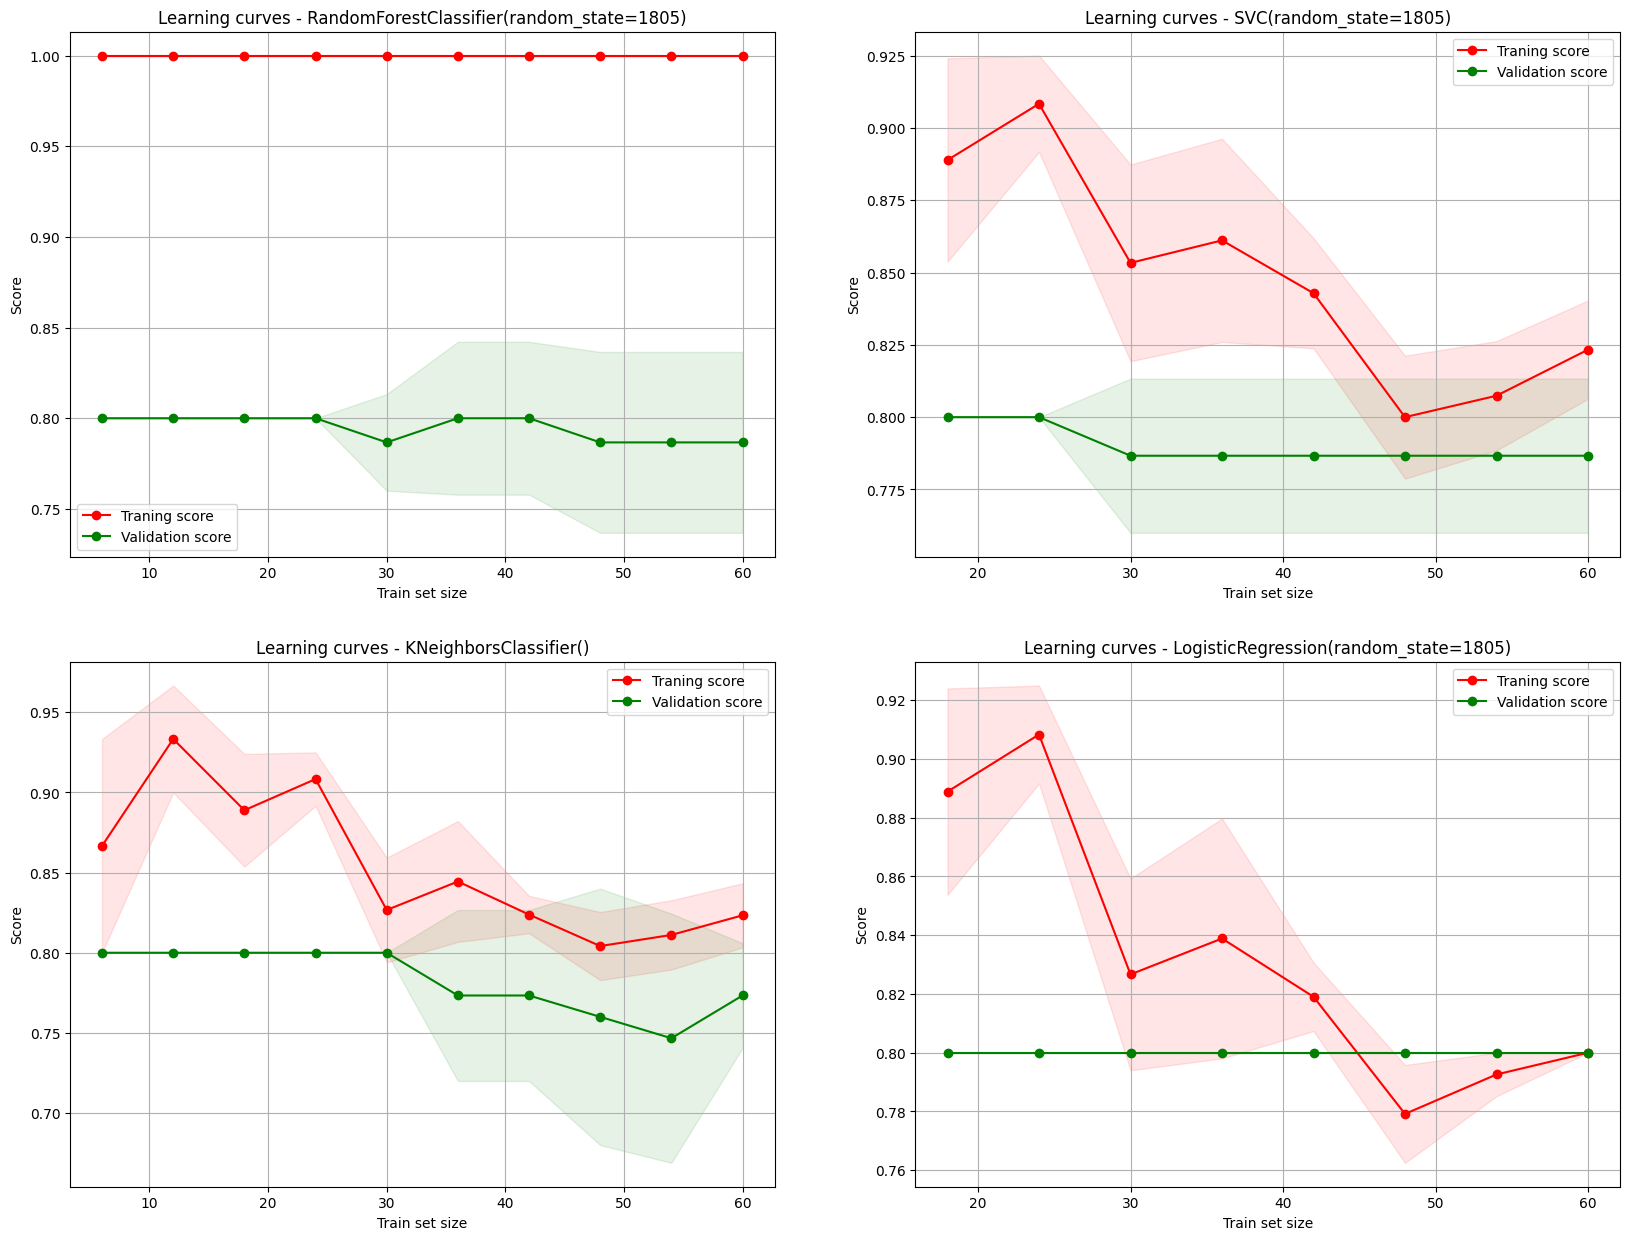

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.99,0.79,0.88,-0.02,Overfitting :0.2,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}",0.85,0.74,0.85,-0.26,Overfitting :0.13,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.80,0.74,0.85,-0.26,Overfitting :0.08,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.83,0.79,0.88,-0.02,Overfitting :0.05,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,5
1.0,2,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.62      0.70        13
         1.0       0.44      0.67      0.53         6

    accuracy                           0.63        19
   macro avg       0.62      0.64      0.61        19
weighted avg       0.69      0.63      0.64        19

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,6,7
1.0,1,5


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.46      0.60        13
         1.0       0.42      0.83      0.56         6

    accuracy                           0.58        19
   macro avg       0.64      0.65      0.58        19
weighted avg       0.72      0.58      0.59        19

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,5
1.0,1,5


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.62      0.73        13
         1.0       0.50      0.83      0.62         6

    accuracy                           0.68        19
   macro avg       0.69      0.72      0.68        19
weighted avg       0.77      0.68      0.69        19

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,6,7
1.0,1,5


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.46      0.60        13
         1.0       0.42      0.83      0.56         6

    accuracy                           0.58        19
   macro avg       0.64      0.65      0.58        19
weighted avg       0.72      0.58      0.59        19

************************************



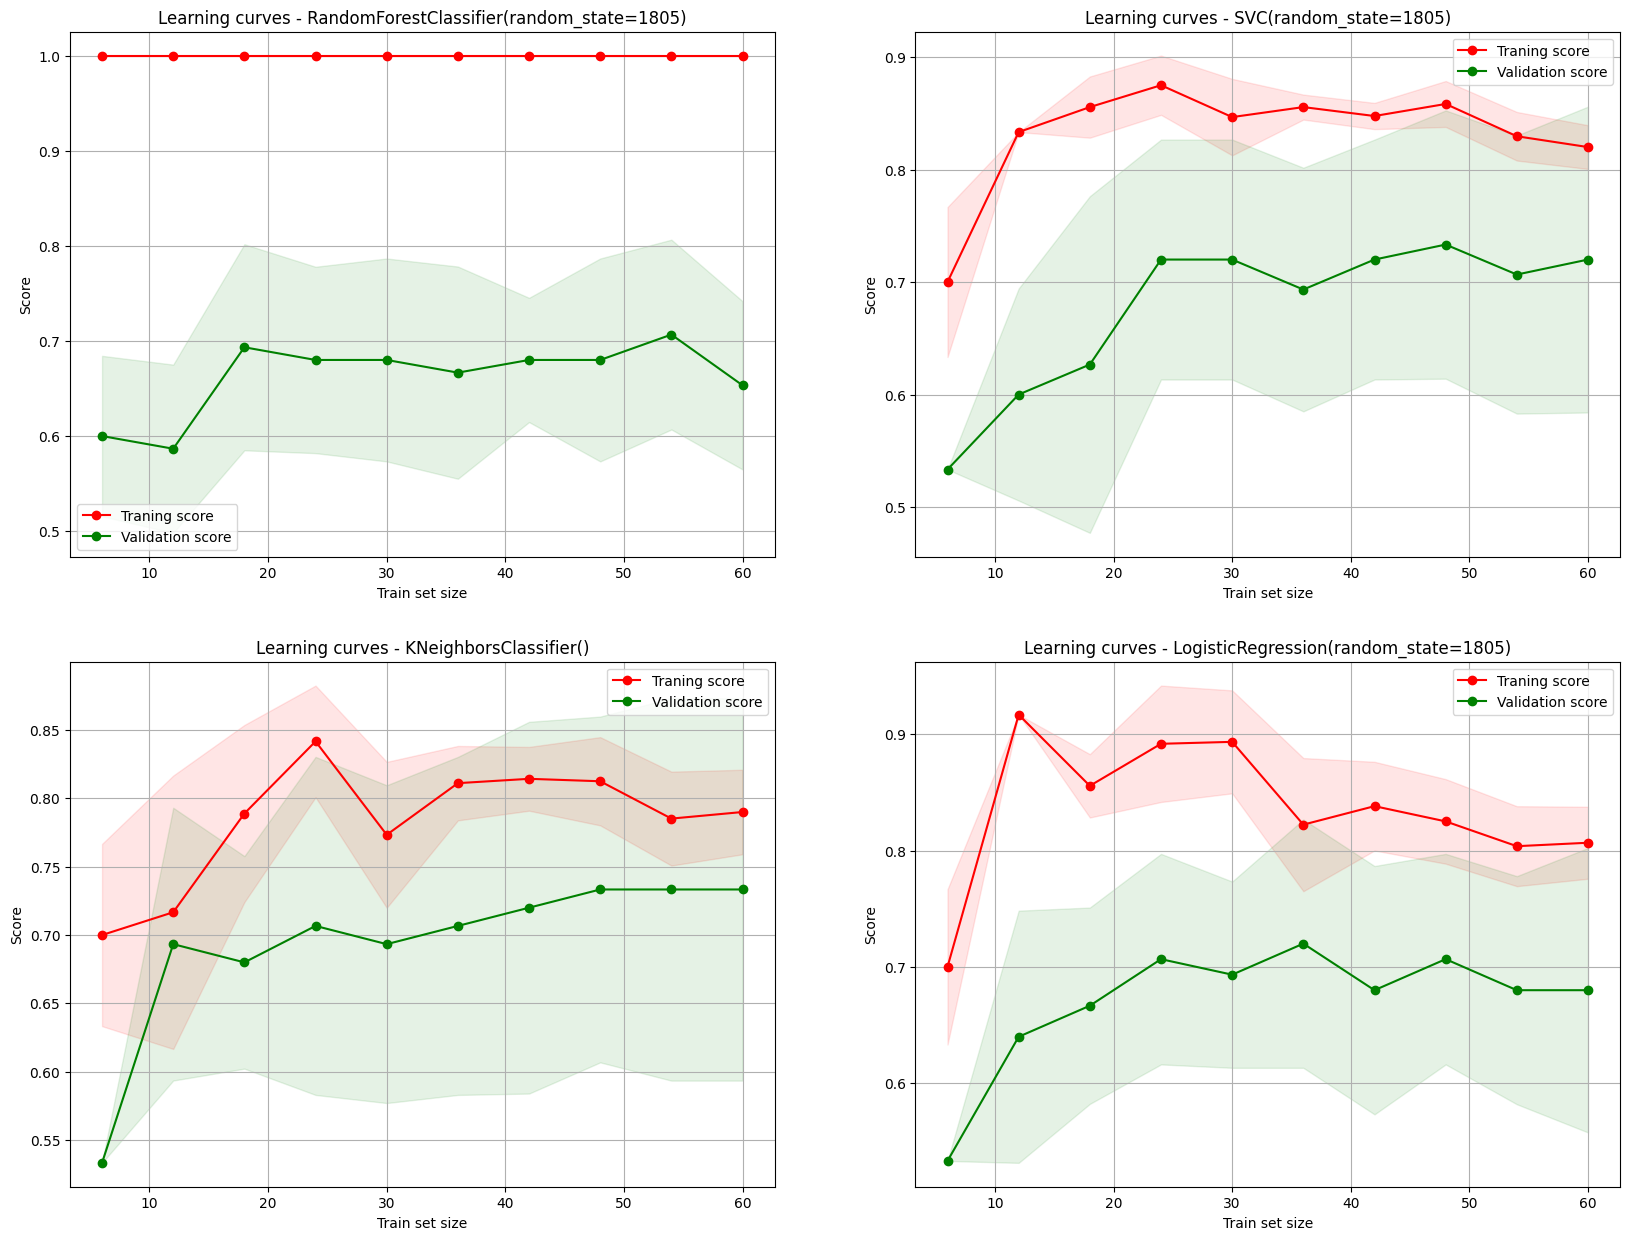

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",1.00,0.63,0.53,-0.10,Overfitting :0.37,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.75,0.58,0.56,-0.19,Overfitting :0.23,too much complex
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.75,0.68,0.62,0.03,Overfitting :0.09,too much complex
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.79,0.58,0.56,-0.19,Overfitting :0.27,too much complex


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,3
1.0,5,3


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67        11
         1.0       0.50      0.38      0.43         8

    accuracy                           0.58        19
   macro avg       0.56      0.55      0.55        19
weighted avg       0.57      0.58      0.57        19

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,6,5
1.0,6,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.50      0.55      0.52        11
         1.0       0.29      0.25      0.27         8

    accuracy                           0.42        19
   macro avg       0.39      0.40      0.39        19
weighted avg       0.41      0.42      0.41        19

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,6,5
1.0,6,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.50      0.55      0.52        11
         1.0       0.29      0.25      0.27         8

    accuracy                           0.42        19
   macro avg       0.39      0.40      0.39        19
weighted avg       0.41      0.42      0.41        19

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,6,5
1.0,5,3


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.55      0.55      0.55        11
         1.0       0.38      0.38      0.38         8

    accuracy                           0.47        19
   macro avg       0.46      0.46      0.46        19
weighted avg       0.47      0.47      0.47        19

************************************



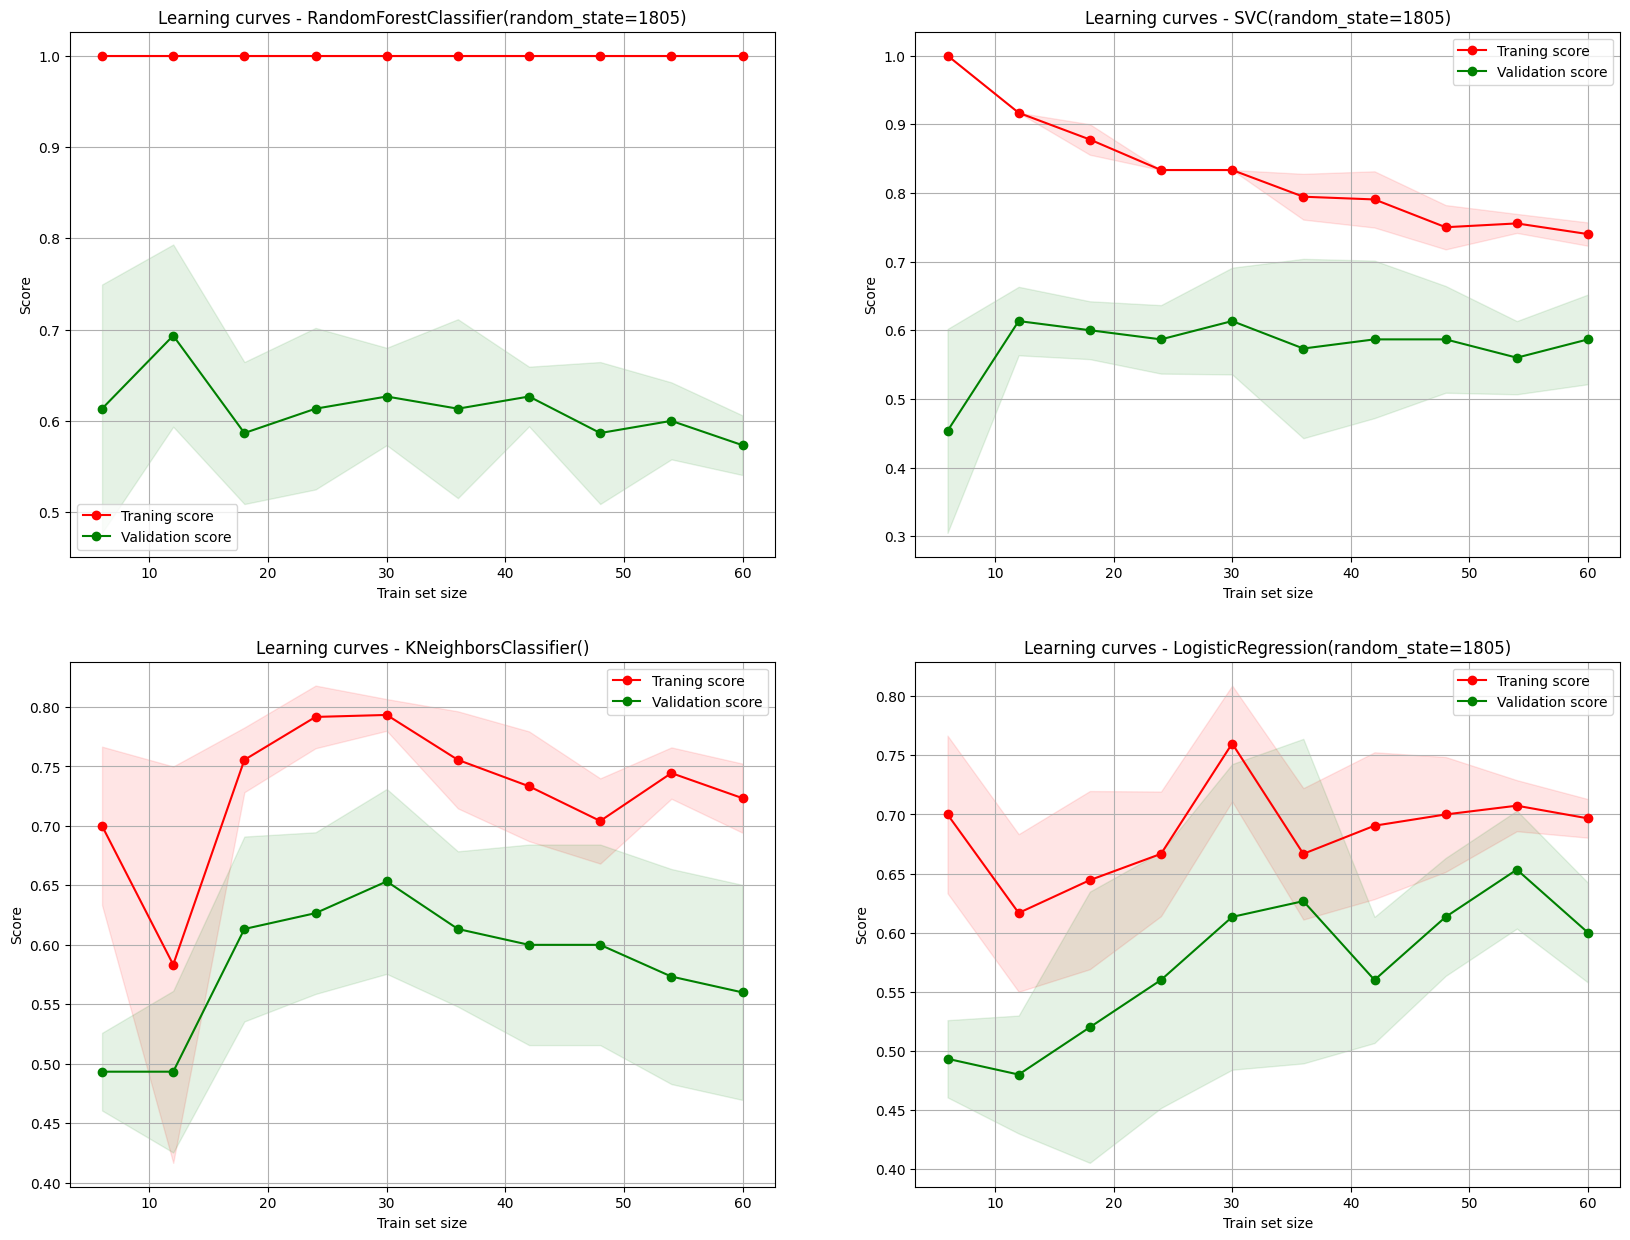

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.99,0.58,0.43,-0.23,Overfitting :0.41,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 1, 'gamma': 10, 'kernel': 'poly'}",0.91,0.42,0.27,-0.49,Overfitting :0.54,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.68,0.42,0.27,-0.49,Overfitting :0.38,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.68,0.47,0.38,-0.39,Overfitting :0.31,too much complex


In [15]:
predict(X_lane_encoded,y_lane, method = 'classification')

### Resampling dataset (create new samples)

In [16]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_encoded,y_lane,n_samples_created=1000)

In [17]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_resampled,y_lane_resampled, _sampling_strategy='auto')

TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,199,2
1.0,9,190


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       201
         1.0       0.99      0.95      0.97       199

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,184,17
1.0,36,163


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.87       201
         1.0       0.91      0.82      0.86       199

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,198,3
1.0,11,188


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       201
         1.0       0.98      0.94      0.96       199

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,125,76
1.0,45,154


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67       201
         1.0       0.67      0.77      0.72       199

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400

************************************



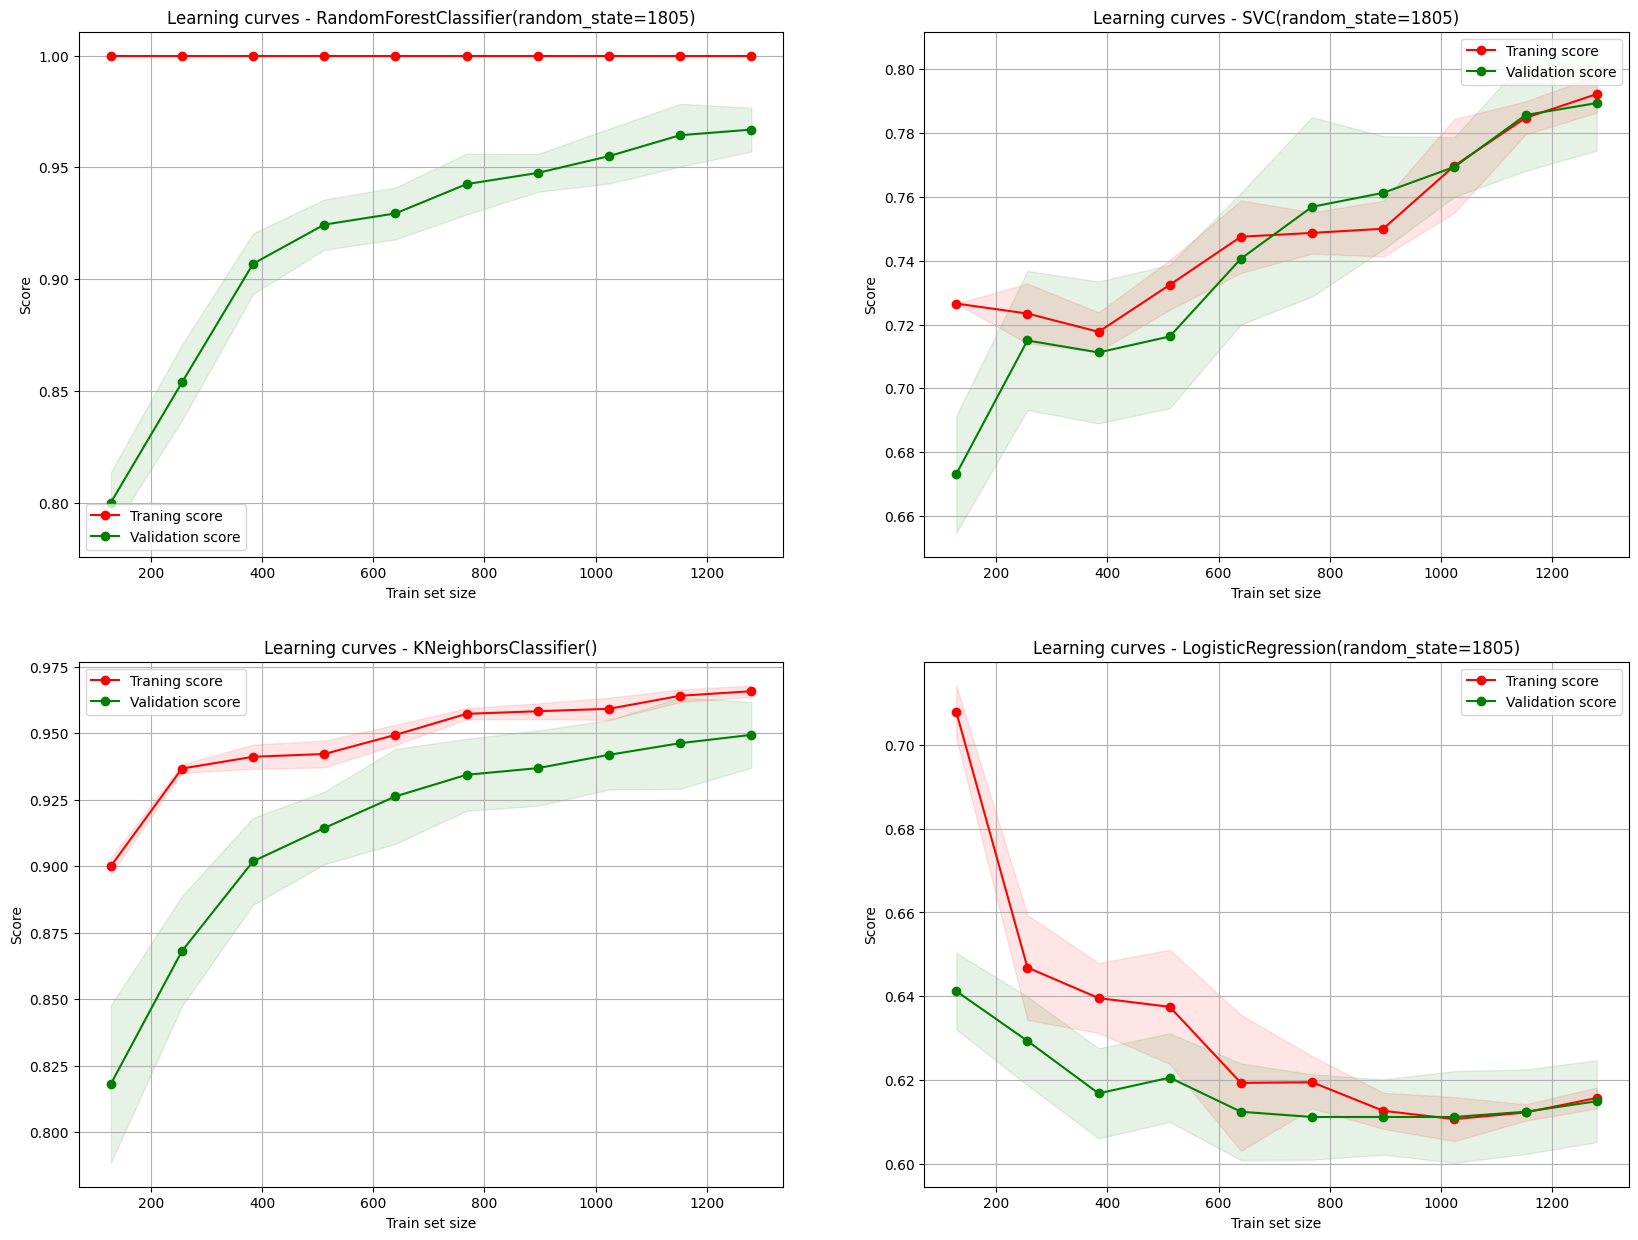

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.00,0.97,0.97,0.89,Overfitting :0.03,not complexe enough
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.86,0.87,0.86,0.53,Underfitting :-0.01,not complexe enough
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 3, 'p': 4, 'weights': 'distance'}",1.00,0.96,0.96,0.86,Overfitting :0.04,not complexe enough
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.71,0.70,0.72,0.07,Overfitting :0.01,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,205,0
1.0,0,195


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       205
         1.0       1.00      1.00      1.00       195

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,205,0
1.0,0,195


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       205
         1.0       1.00      1.00      1.00       195

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,204,1
1.0,1,194


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       205
         1.0       0.99      0.99      0.99       195

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,201,4
1.0,9,186


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       205
         1.0       0.98      0.95      0.97       195

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

************************************



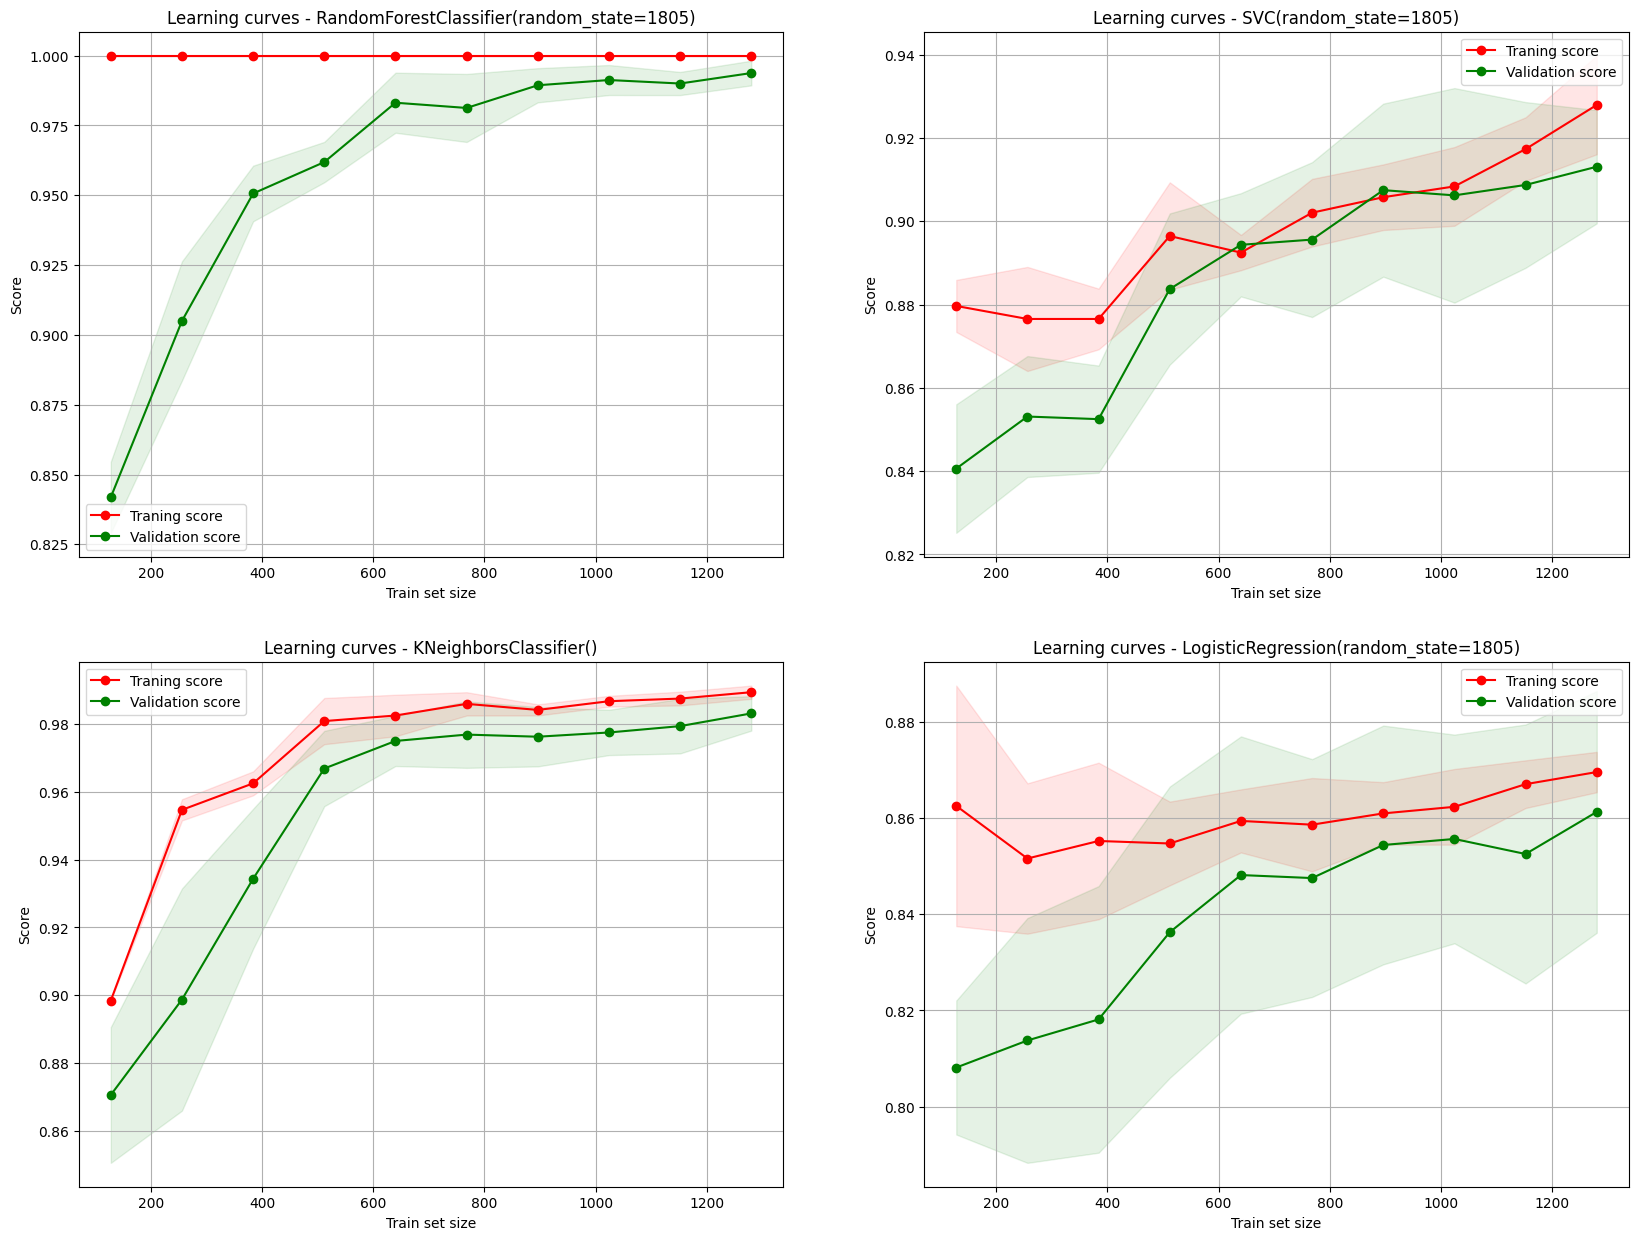

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.00,1.00,1.00,1.00,Overfitting :0.0,not complexe enough
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",1.00,1.00,1.00,1.00,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.00,1.00,0.99,0.98,Overfitting :0.0,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.96,0.97,0.97,0.87,Underfitting :-0.01,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,202,4
1.0,7,187


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       206
         1.0       0.98      0.96      0.97       194

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,197,9
1.0,5,189


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       206
         1.0       0.95      0.97      0.96       194

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,203,3
1.0,3,191


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       206
         1.0       0.98      0.98      0.98       194

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,139,67
1.0,70,124


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       206
         1.0       0.65      0.64      0.64       194

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400

************************************



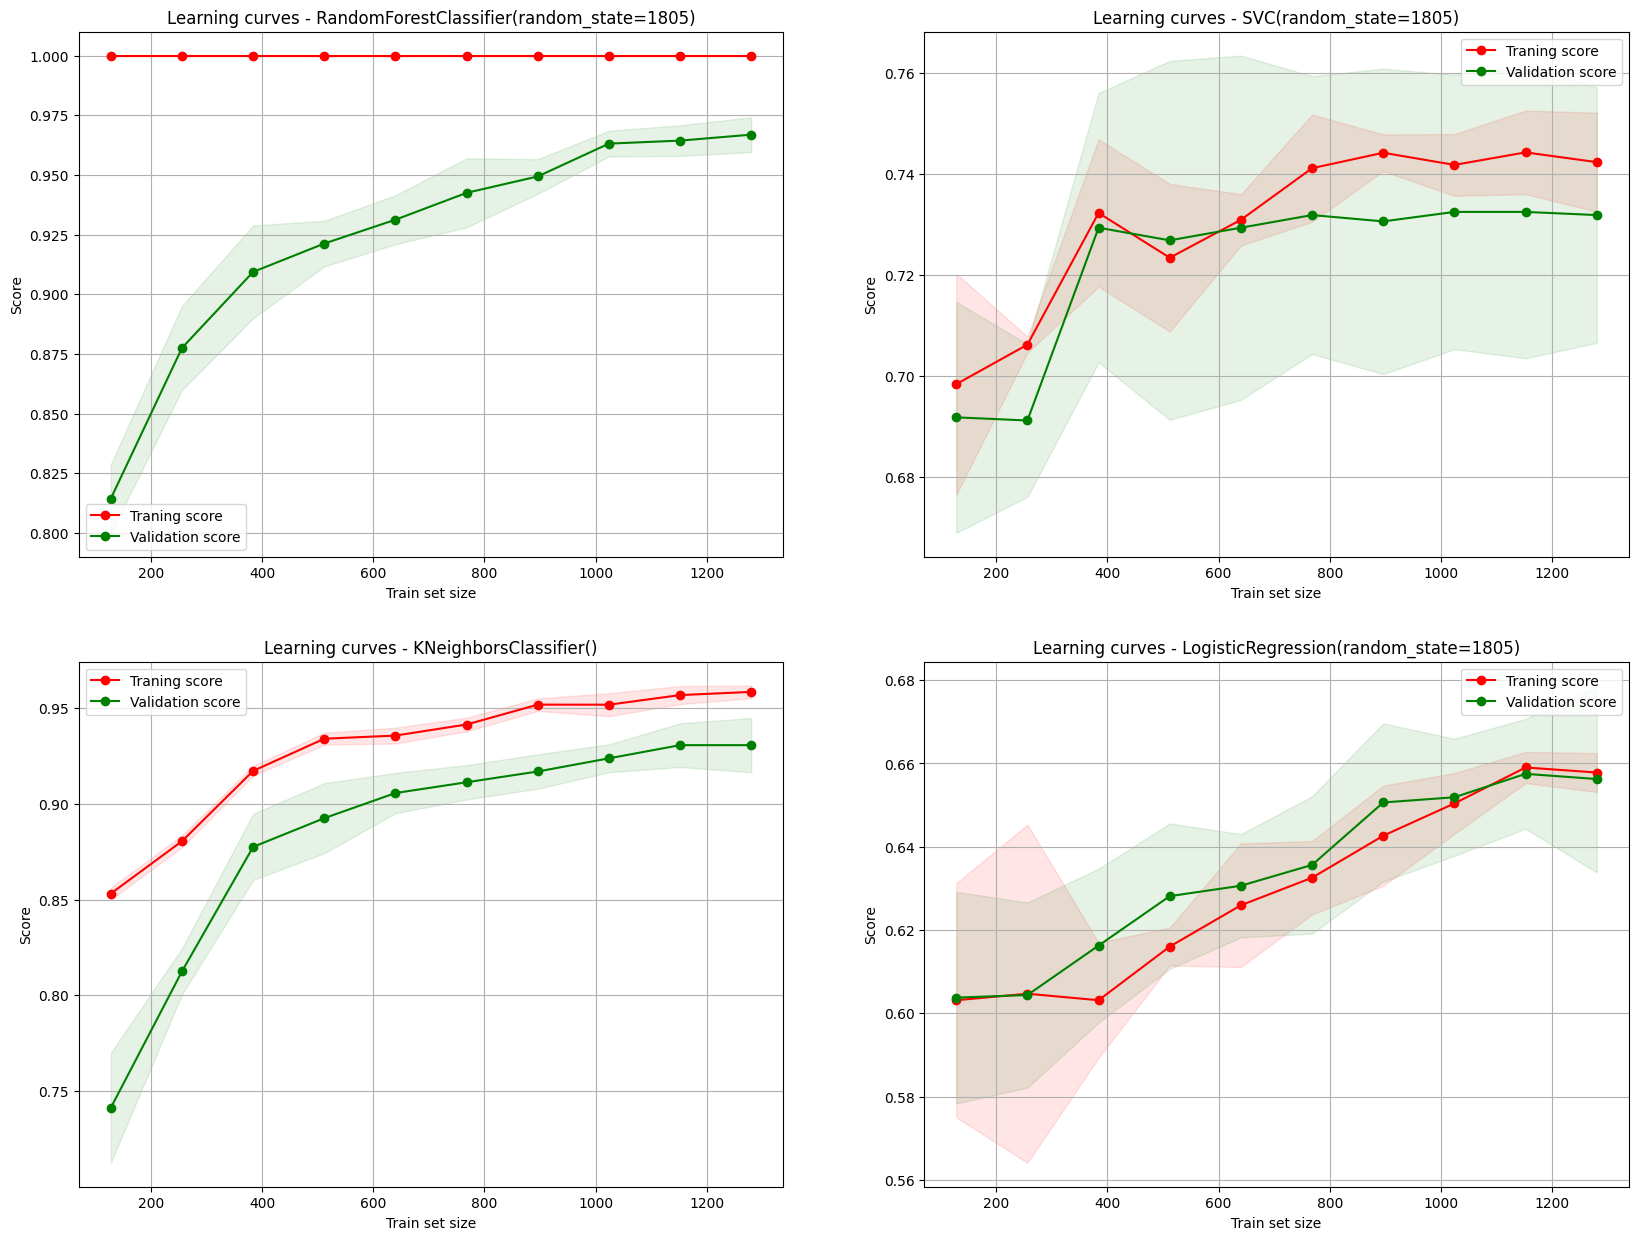

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.00,0.97,0.97,0.89,Overfitting :0.03,not complexe enough
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.98,0.96,0.96,0.86,Overfitting :0.02,not complexe enough
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.00,0.98,0.98,0.94,Overfitting :0.02,not complexe enough
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.68,0.66,0.64,-0.02,Overfitting :0.03,not complexe enough


In [18]:
predict(X_lane_resampled,y_lane_resampled, method = 'classification')

### TAKE-OVER WITHOUT CHANGING LANE

In [19]:
X_no_lane_reduced, no_lane_pvalues = discriminate_target_association(X_no_lane,y_no_lane)

In [20]:
no_lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,...,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.011,0.047,0.095,0.002,0.0,0.0,0.011,0.006,0.0,0.001,0.0,0.992,0.992,0.141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494,...,0.006,0.0,0.001,0.0,0.992,0.992,0.141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494,0.006,0.006,0.0,0.107,0.416,0.0,0.637,0.067,0.0,0.229,0.0,0.133,0.0,0.0
TOQ (Coll a/o ILC),0.19,0.129,0.162,0.049,0.087,0.312,0.008,0.888,0.176,0.18,0.78,0.458,0.574,0.552,0.205,0.457,0.941,0.808,0.226,0.225,0.202,0.779,0.777,0.837,0.862,0.716,0.951,0.767,0.857,0.853,0.703,0.803,0.417,0.585,0.635,0.487,0.736,0.923,0.853,0.941,0.883,0.416,0.853,0.752,0.718,0.928,0.615,0.366,0.389,0.277,0.328,0.724,0.11,0.885,0.925,0.713,0.931,0.615,0.494,0.606,0.548,0.384,0.716,0.635,0.558,0.757,0.451,0.336,0.388,0.318,0.307,0.758,0.573,0.842,0.185,...,0.205,0.457,0.941,0.808,0.226,0.225,0.202,0.779,0.777,0.837,0.862,0.716,0.951,0.767,0.857,0.853,0.703,0.803,0.417,0.585,0.635,0.487,0.736,0.923,0.853,0.941,0.883,0.416,0.853,0.752,0.718,0.928,0.615,0.366,0.389,0.2

In [21]:
for key in y_no_lane:
    display(pd.DataFrame(no_lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o ILC)
NDRT solicitation gaze,0.008
NDRT solicitation gaze,0.008
ID NDRT,0.049
ID NDRT,0.049
Mean\npupil diameter (pixel),0.051
Mean\npupil diameter (pixel),0.051
NDRT duration (s),0.087
NDRT duration (s),0.087
Pz DELTA 1-4Hz,0.11
Pz DELTA 1-4Hz,0.11


In [22]:
X_no_lane_encoded = encoding_one_hot(X_no_lane_reduced)
list(X_no_lane_encoded.values())[0]

,ID NDRT_1,ID NDRT_2,ID NDRT_3,ID NDRT_4,ID NDRT_5,ID NDRT_6,NDRT solicitation gaze_0,NDRT solicitation gaze_1,NDRT solicitation gaze_2
1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0
8,0,0,0,0,0,1,0,1,0
9,0,1,0,0,0,0,0,0,1
15,0,1,0,0,0,0,0,0,1
19,0,0,0,0,0,1,0,1,0
20,1,0,0,0,0,0,1,0,0
23,0,0,0,1,0,0,0,1,0
27,0,1,0,0,0,0,0,0,1
31,0,0,0,0,0,1,0,1,0


In [23]:
for k in X_no_lane_encoded:
    X_no_lane_encoded[k] = X_no_lane_encoded[k].astype(int)

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,5,1
1.0,1,3


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0
Real class,
0.0,6
1.0,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0
Real class,
0.0,6
1.0,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0
Real class,
0.0,6
1.0,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

************************************



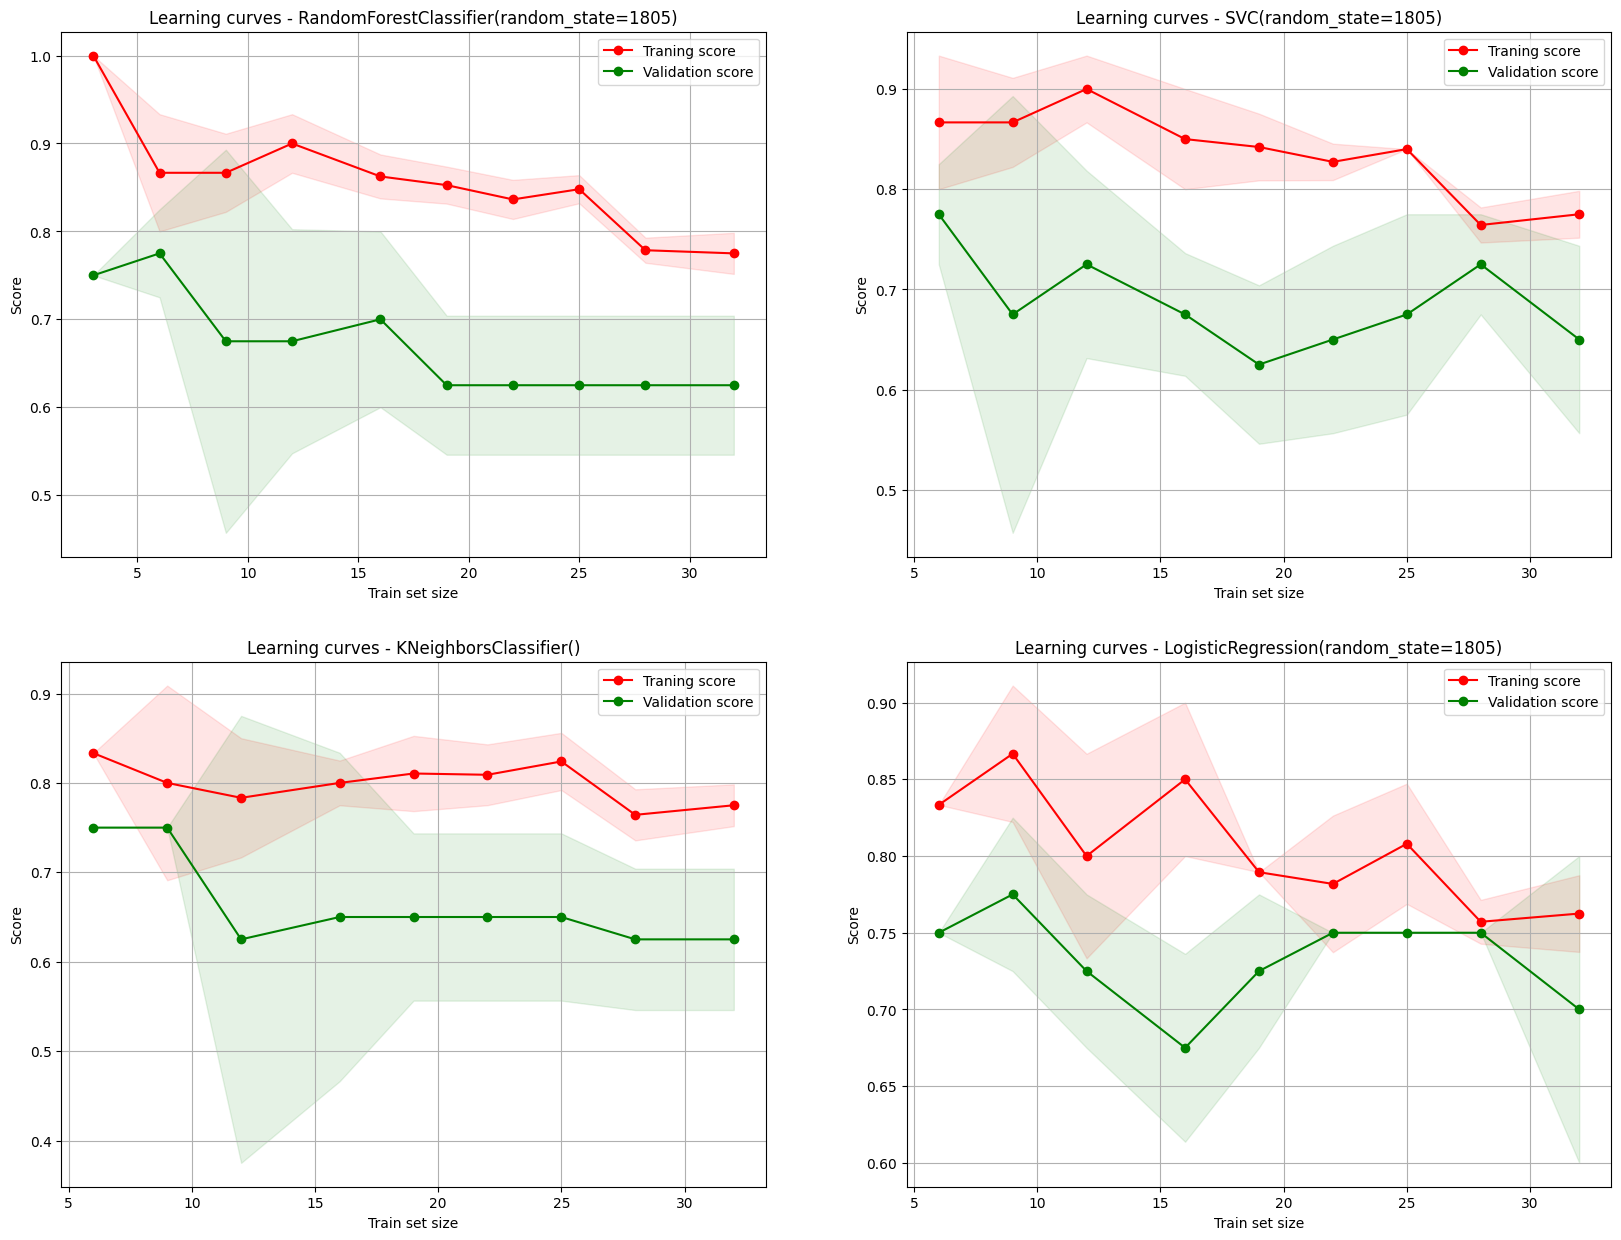

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.75,0.8,0.75,0.31,Underfitting :-0.07,too much complex
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.75,0.6,0.00,-0.40,Overfitting :0.2,too much complex
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.75,0.6,0.00,-0.40,Overfitting :0.2,too much complex
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.75,0.6,0.00,-0.40,Overfitting :0.2,too much complex


In [24]:
predict(X_no_lane_encoded,y_no_lane, method = 'classification')

### Resampling dataset (create new samples)

In [25]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_encoded,y_no_lane,n_samples_created=200)

In [26]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_resampled,y_no_lane_resampled, _sampling_strategy='auto')

In [27]:
X_no_lane_resampled

{'TOQ (Coll a/o  ILC)':      ID NDRT_1  ID NDRT_2  ID NDRT_3  ID NDRT_4  ID NDRT_5  ID NDRT_6  \
 0            0          1          0          0          0          0   
 1            0          0          0          0          0          1   
 2            0          0          0          0          0          1   
 3            0          1          0          0          0          0   
 4            0          1          0          0          0          0   
 ..         ...        ...        ...        ...        ...        ...   
 395          0          0          0          0          0          1   
 396          0          0          0          0          0          0   
 397          0          0          0          0          0          1   
 398          0          0          0          0          0          1   
 399          0          0          0          0          0          0   
 
      NDRT solicitation gaze_0  NDRT solicitation gaze_1  \
 0                         

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,24,9
1.0,0,47


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        33
         1.0       0.84      1.00      0.91        47

    accuracy                           0.89        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.89      0.88        80

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,23,10
1.0,0,47


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82        33
         1.0       0.82      1.00      0.90        47

    accuracy                           0.88        80
   macro avg       0.91      0.85      0.86        80
weighted avg       0.90      0.88      0.87        80

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,24,9
1.0,0,47


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        33
         1.0       0.84      1.00      0.91        47

    accuracy                           0.89        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.89      0.88        80

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,23,10
1.0,0,47


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82        33
         1.0       0.82      1.00      0.90        47

    accuracy                           0.88        80
   macro avg       0.91      0.85      0.86        80
weighted avg       0.90      0.88      0.87        80

************************************



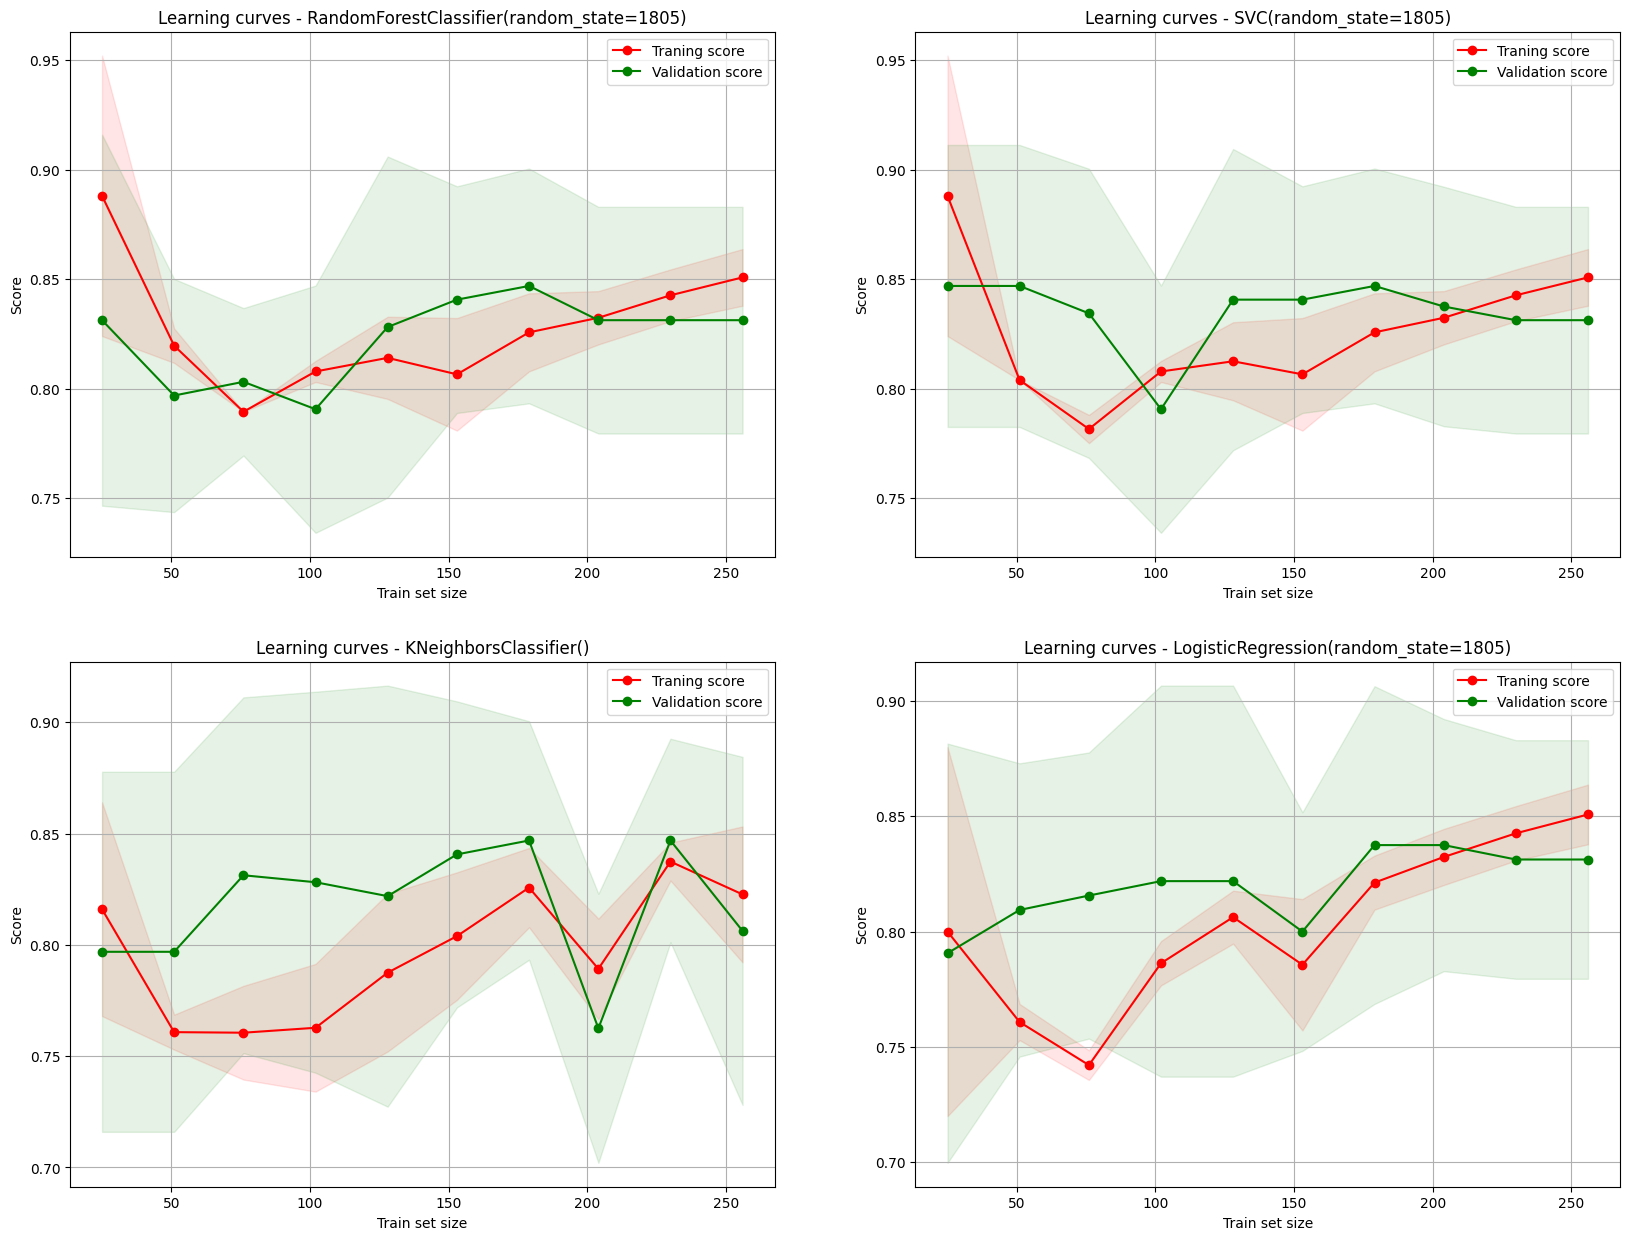

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.85,0.89,0.91,0.57,Underfitting :-0.05,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",0.85,0.88,0.90,0.52,Underfitting :-0.04,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.85,0.89,0.91,0.57,Underfitting :-0.05,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.85,0.88,0.90,0.52,Underfitting :-0.04,not complexe enough


In [28]:
predict(X_no_lane_resampled,y_no_lane_resampled, method = 'classification')

### TAKE-OVER TIME

In [29]:
X_TOT_reduced, TOT_pvalues = discriminate_target_association(X_TOT,y_TOT)

In [30]:
X_TOT_encoded = encoding_one_hot(X_TOT_reduced)
list(X_TOT_encoded.values())[0]

,FRONTAL THETA/BETA,SD Pupil diameter
0,0.603393,0.091588
1,0.769638,0.192939
2,0.594038,0.069437
3,0.497136,0.133017
4,0.683841,0.149757
...,...,...
150,0.756443,0.181345
151,0.707930,0.157526
152,0.443698,0.205443
153,0.709244,0.181239


In [31]:
list(X_TOT_reduced.values())[0]

,FRONTAL THETA/BETA,SD Pupil diameter
0,0.603393,0.091588
1,0.769638,0.192939
2,0.594038,0.069437
3,0.497136,0.133017
4,0.683841,0.149757
...,...,...
150,0.756443,0.181345
151,0.707930,0.157526
152,0.443698,0.205443
153,0.709244,0.181239


In [32]:
TOT_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,MRRHRV,MeanRR,FC,SDNN,RMSSD,PNN50,TRI,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,...,TINN,SD1,SD2,SD1SD2Ratio,HF,LF,LFHFRatio,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Number of Fixations,Fixation frequency\n(/s),Mean duration of fixation (ms),Mean \ndispersion fixations (pixel),Mean\npupil diameter (pixel),SD Pupil diameter,Mean distance\nsaccade (pixel),SD distance\nsaccade,Mean \nvelocity saccade (pixel/s),SD\nvelocity Saccades,Mean velocity variation saccade (pixel/s²),SD velocity variation saccade,Mean acceleration\n saccade (pixel/s²),Mean deceleration \nsaccade (pixel/s²)
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.023,0.108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.789,0.789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.0,0.0,0.789,0.789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.002,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOT (s),0.195,0.577,0.306,0.331,0.214,0.152,0.441,0.577,0.162,0.162,0.438,0.61,0.348,0.578,0.824,0.611,0.431,0.588,0.367,0.367,0.4,0.413,0.646,0.531,0.329,0.352,0.315,0.437,0.438,0.335,0.444,0.769,0.942,0.939,0.812,0.884,0.767,0.744,0.875,0.702,0.671,0.558,0.831,0.701,0.472,0.514,0.448,0.518,0.599,0.495,0.577,0.923,0.884,0.753,0.491,0.536,0.478,0.691,0.581,0.726,0.997,0.426,0.602,0.46,0.338,0.357,0.326,0.361,0.389,0.353,0.471,0.513,0.803,0.49,0.015,...,0.824,0.611,0.431,0.588,0.367,0.367,0.4,0.413,0.646,0.531,0.329,0.352,0.315,0.437,0.438,0.335,0.444,0.769,0.942,0.939,0.812,0.884,0.767,0.744,0.875,0.702,0.671,0.558,0.831,0.701,0.472,0.514,0.448,0.518,0.599,0.495,0.577,0.923,0.884,0.753,0.491,0.536,0.478

In [33]:
for key in y_TOT:
    display(pd.DataFrame(TOT_pvalues.T[key].sort_values()[:10]))

,TOT (s)
SD Pupil diameter,0.01
SD Pupil diameter,0.01
FRONTAL THETA/BETA,0.015
FRONTAL THETA/BETA,0.015
Mean\npupil diameter (pixel),0.149
Mean\npupil diameter (pixel),0.149
NDRT solicitation hands,0.152
NDRT solicitation hands,0.152
FC,0.162
MeanRR,0.162


TOT (s)



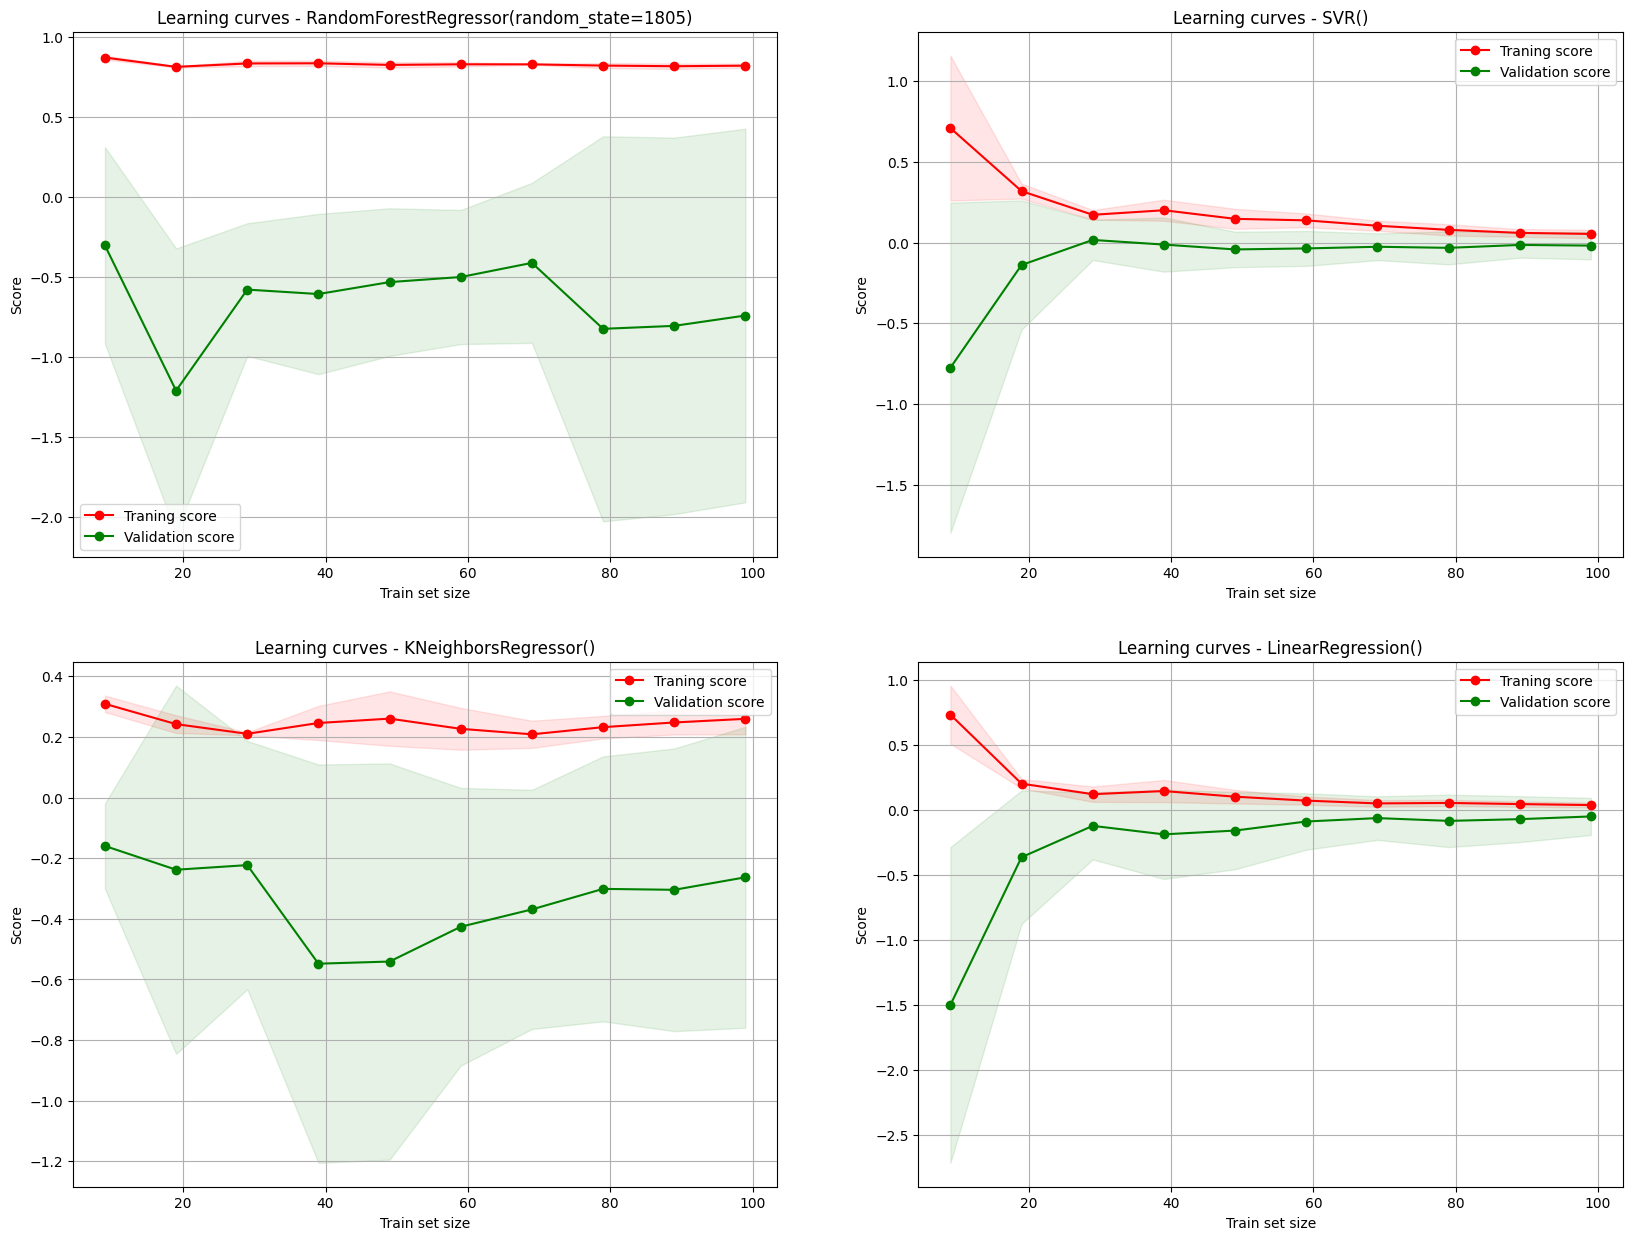

,target,model,hyperparameters,grid_score_train,grid_score_test,mse,mae,rmse,mean_error (s),fitting,complexity
0,TOT (s),Random Forest,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.76,-0.12,0.050,0.115,0.225,0.115,Overfitting :1.16,too much complex
1,TOT (s),SVR,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}",0.06,-0.00,0.045,0.102,0.212,0.103,Overfitting :1.0,too much complex
2,TOT (s),KNN Regressor,"{'n_neighbors': 20, 'p': 2, 'weights': 'distan...",1.00,0.04,0.043,0.113,0.208,0.113,Overfitting :0.96,too much complex
3,TOT (s),Linear Regression,{},0.03,0.01,0.045,0.118,0.211,0.118,Overfitting :0.67,not complexe enough


In [34]:
predict(X_TOT_encoded,y_TOT, method = 'regression')